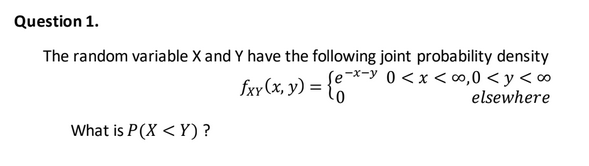

In [1]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np

def f(x,y):
  return np.exp(-x-y)

def bounds_y():
  return [0, np.inf]

def bounds_x(y):
  return [0, y]

result = sum(integrate.nquad(f, [bounds_x,bounds_y]))
print (result)

0.5000000000584377


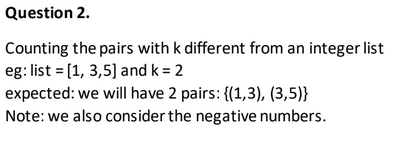

In [2]:
lst = [1,3,5] 
k = 2
{(i, i+k)  for i in set(lst) if (i+k in set(lst))}

{(1, 3), (3, 5)}

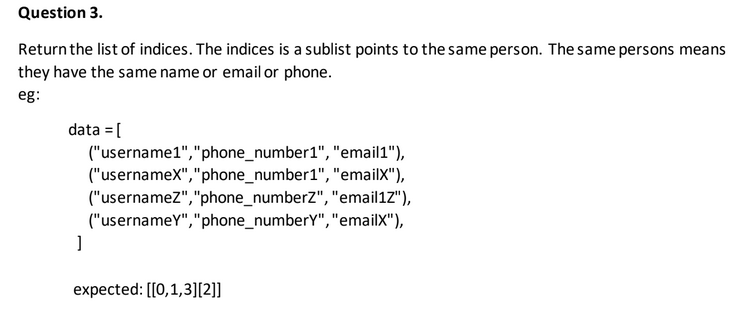

# Method 1

In [3]:
data = [
("username1","phone_number1", "email1"),
("usernameX","phone_number1", "emailX"),
("usernameZ","phone_numberZ", "email1Z"),
("usernameY","phone_numberY", "emailX"),
]

In [4]:
from collections import defaultdict

tallyemail, tallyphone, tallyuser = defaultdict(list), defaultdict(list), defaultdict(list)

[[tallyuser[k[0]].append(i), tallyphone[k[1]].append(i), tallyemail[k[2]].append(i)] for i,k in enumerate(data)]

userskey, phonekey, emailkey = list(tallyuser.values()), list(tallyphone.values()), list(tallyemail.values())

all = userskey + phonekey + emailkey



In [5]:
import networkx 
from networkx.algorithms.components.connected import connected_components

def to_graph(l):
    G = networkx.Graph()
    for part in l:
        # each sublist is a bunch of nodes
        G.add_nodes_from(part)
        # it also imlies a number of edges:
        G.add_edges_from(to_edges(part))
    return G

def to_edges(l):
    """ 
        treat `l` as a Graph and returns it's edges 
        to_edges(['a','b','c','d']) -> [(a,b), (b,c),(c,d)]
    """
    it = iter(l)
    last = next(it)

    for current in it:
        yield last, current
        last = current 


G = to_graph(all)
print([i for i in connected_components(G)])

[{0, 1, 3}, {2}]


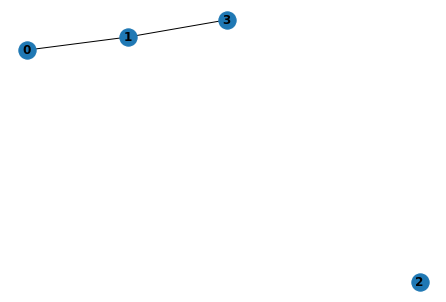

In [6]:
import matplotlib.pyplot as plt
networkx.draw(G, with_labels=True, font_weight='bold')

# Method 2

In [7]:
duplicates = [i for i in all if len(i)>1]

non_duplicates = [j for i in all for j in i if len(i)==1]

duplicate_index = list(set([j for i in duplicates for j in i]))

unique = set([i for i in non_duplicates if i not in duplicate_index])

dictionary = {}
family = 0
for grp in duplicates:
  found = None
  numbers = []
  for number in grp:
    if number in dictionary:
      found = dictionary[number]
      for i in grp:
        dictionary[i]=found
      break
    else:
      numbers.append(number)
  for i in numbers:
    dictionary[i] = family 
  family+=1


group_values = defaultdict(list)
for key, val in sorted(dictionary.items()):
    group_values[val].append(key)

list(group_values.values()) + list(unique)


[[0, 1, 3], 2]

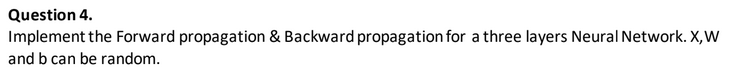

In [8]:
import numpy as np

# Data Set

Xor_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Xor_output = np.array([[0, 1, 1, 0]]).T

or_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_output = np.array([[0, 1, 1, 1]]).T

X = Xor_input
Y = Xor_output

# Define the shape of the weight vector.
num_data, input_dim = X.shape
# Lets set the dimensions for the intermediate layer.
layer0to1_hidden_dim = 10
layer1to2_hidden_dim = 10

num_epochs = 10000
learning_rate = 0.1


def sigmoid(x):  # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(sx):
    return sx * (1 - sx)


def cost(predicted, truth):
    return truth - predicted


# Initialize weights vector
W1 = np.random.uniform(size=(input_dim, layer0to1_hidden_dim))
W2 = np.random.uniform(size=(layer0to1_hidden_dim, layer1to2_hidden_dim))
# Define the shape of the output vector.
output_dim = len(Y.T)
W3 = np.random.uniform(size=(layer1to2_hidden_dim, output_dim))

# Initialize biases
B1 = np.random.uniform(size=(1, layer0to1_hidden_dim))
B2 = np.random.uniform(size=(1, layer1to2_hidden_dim))
B3 = np.random.uniform(size=(1, output_dim))

for epoch_n in range(num_epochs):
    layer0 = X
    # Forward propagation.

    # Multiply the weights vector with the inputs, sum the products
    # and put the sum through the sigmoid, i.e. f(s)
    layer1 = sigmoid(np.dot(layer0, W1) + B1)
    layer2 = sigmoid(np.dot(layer1, W2) + B2)
    layer3 = sigmoid(np.dot(layer2, W3) + B3)

    # Back propagation (Y -> layer2)
    # Compute the errors, i.e. difference between expected output and predictions
    layer3_error = cost(layer3, Y)
    layer3_delta = layer3_error * sigmoid_derivative(layer3)

    layer2_error = np.dot(layer3_delta, W3.T)
    layer2_delta = layer3_error * sigmoid_derivative(layer2)

    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # update weights
    W3 += learning_rate * np.dot(layer2.T, layer3_delta)
    W2 += learning_rate * np.dot(layer1.T, layer2_delta)
    W1 += learning_rate * np.dot(layer0.T, layer1_delta)

    B3 += learning_rate * np.sum(layer3_delta,axis=0,keepdims=True)
    B2 += learning_rate * np.sum(layer2_delta, axis=0, keepdims=True)
    B1 += learning_rate * np.sum(layer1_delta, axis=0, keepdims=True)

print("Predicted Output Confidence")
print(layer3)
print("Predicted Output")
print([int(prediction > 0.5) for prediction in layer3])
print("Ground Truth")
print(Y.T)

Predicted Output Confidence
[[0.01375717]
 [0.99373965]
 [0.98893456]
 [0.02107243]]
Predicted Output
[0, 1, 1, 0]
Ground Truth
[[0 1 1 0]]
